# Presentación

Comisión:  1

Número de grupo: 25 

Integrantes: 

-  Brizuela Cipolletti, Sofia. Legajo: B-6419/1 

- Ferrero, Santiago. Legajo: F-3747/8

- Rodriguez, Abril Nazarena. Legajo: R-4582/9


Link del archivo csv: [Life_Expectancy_00_15.csv](https://www.kaggle.com/datasets/ed50487457d4c86f85e979d87a8b5bbe5d264ab5eb27fa937d37840bfce9673e/code)

Link del archivo de Google Colab: [TP Final](https://colab.research.google.com/drive/1eLqxfH7fZUSeREw9QbBKpRFKC45xl4Wi#scrollTo=wYzmhlSpW7pY)



# Problema

El objetivo del presente trabajo es dar respuesta a las tres preguntas que nos hemos formulado. Ellas son:

- ¿CÓMO ES LA SITUACIÓN DE ARGENTINA RESPECTO AL RESTO DE AMÉRICA DEL SUR?
- ¿CÓMO ES LA SITUACIÓN DE AMÉRICA DEL SUR RESPECTO AL RESTO DE LOS CONTINENTES?
- ¿CUÁLES SON LOS PAÍSES DE AMÉRICA DEL SUR QUE MÁS GASTOS DESTINAN A LA SALUD? ¿TIENE ESTO RELACIÓN CON SU ESPERANZA DE VIDA PROMEDIO?

Para responder a las mismas, accederemos a la información brindada por kaggle acerca de la esperanza de vida mundial y sus factores determinantes mediante su lectura y procesamiento a través del módulo de pandas. 

Para finalizar, plasmaremos los resultados obtenidos en los gráficos que consideremos adecuados con el fin de facilitar su visualización y comprensión.

# Explorando el dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
data = pd.read_csv('Life_Expectancy_00_15.csv', sep=';')

In [ ]:
data.head()

In [ ]:
data.isnull().values.any() #concluímos que no hay valores nulos

False

In [ ]:
data.duplicated().sum() #concluímos que no hay valores duplicados

In [ ]:
data.rename(columns = {'Country': 'Pais', 'Population': 'Población', 'Year': 'Año', 'Continent': 'Continente'}, inplace = True)

In [ ]:
data.set_index(['Año','Pais'], inplace= True)

In [ ]:
data.columns

In [ ]:
data['Continente'].describe() 
#Podemos ver que hay seis continentes, de los cuales Europa es el que más aparece (608 veces) 

In [ ]:
data['Pais'].describe()
#Podemos ver que en el dataset hay 119 países y cada uno aparece 16 veces

In [ ]:
cant_pais_cont = data.groupby(['Continente']).size()
cant_pais_cont/16
#Podemos ver la cantidad de países por continente, se divide por 16 ya que se trabaja sobre los últimos quince años de cada país

Text(0.5, 0, 'País')

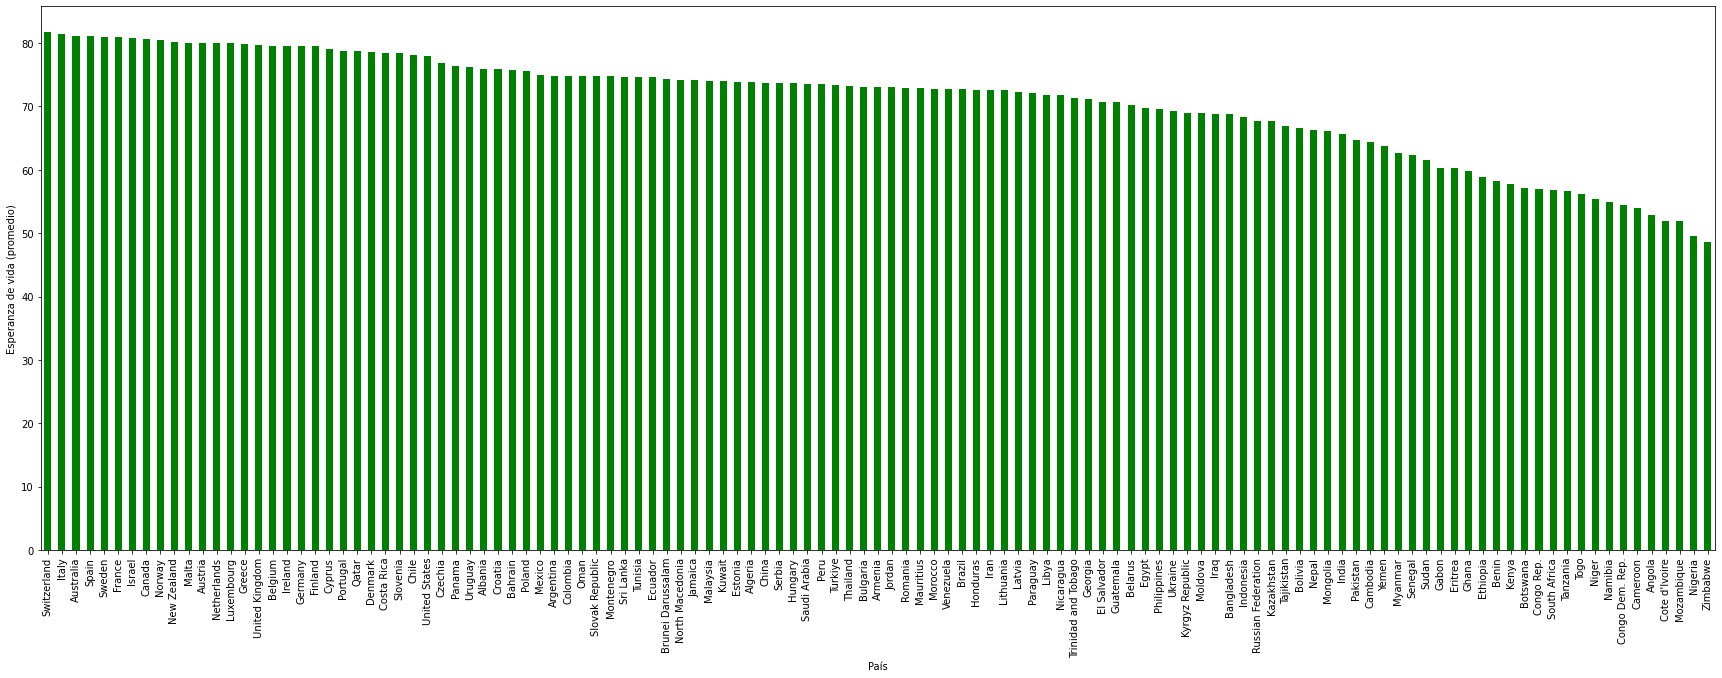

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
g1 = data.groupby('Pais')['Life Expectancy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color='green')
g1.set_ylabel('Esperanza de vida (promedio)')
g1.set_xlabel('País')
#plt.show()

Text(0, 0.5, 'Life expectancy')

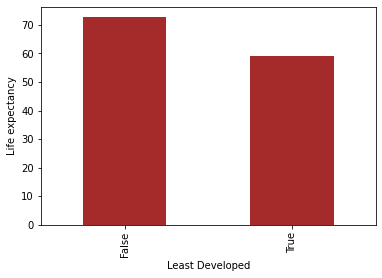

In [ ]:
g2 = data.groupby("Least Developed")["Life Expectancy"].mean()
g2.plot(kind="bar", color="brown")
plt.ylabel("Life expectancy")

#Primera Pregunta

Aquí nos preguntamos... ¿Cuál es la situación de Argentina respecto al resto de Ámerica del Sur? Es decir, ¿A cuántos países supera su promedio de esperanza de vida? ¿A cúantos no? ¿Es mucha esa diferencia?

Pais
Argentina    74.851750
Bolivia      66.579313
Brazil       72.693938
Chile        78.147063
Colombia     74.817312
Ecuador      74.558063
Paraguay     72.146438
Peru         73.599375
Uruguay      76.208125
Venezuela    72.757125
Name: Life Expectancy, dtype: float64


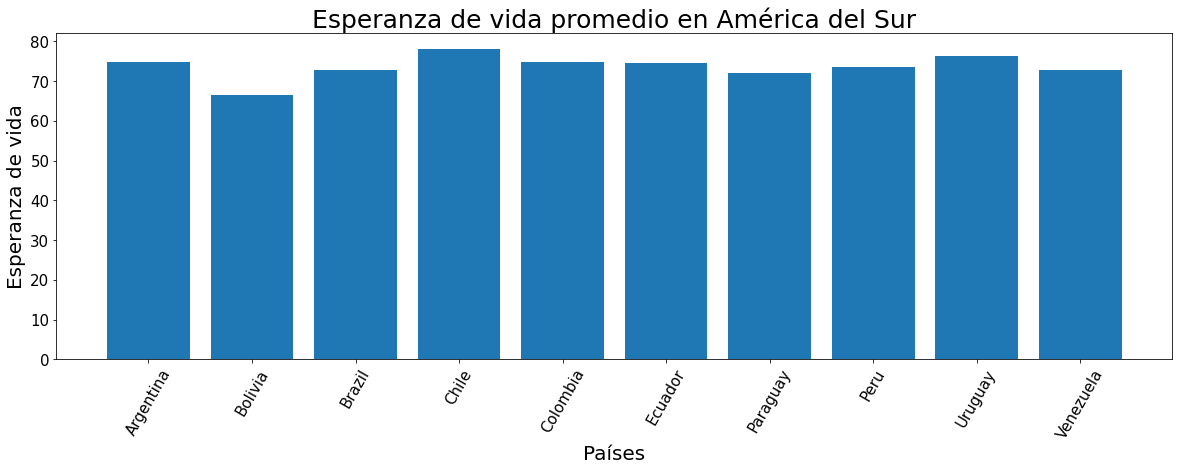

In [ ]:
suramerica = data[data['Continente']=='South America']  #filtramos a América del Sur en un dataframe

#suramerica.groupby(['Pais'])['Life Expectancy'].mean().plot(kind = 'bar') #promedio de vida por pais (suramericanos)
print(suramerica.groupby(['Pais'])['Life Expectancy'].mean())

suramerica_proms = list(suramerica.groupby(['Pais'])['Life Expectancy'].mean()) 

paises = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'] 

def grafico_barras(titulo, etiqueta_x, etiqueta_y, datos_x, datos_y):
  plt.figure(figsize = (20,6)) #Da las dimensiones de la figura
  plt.xticks(rotation = 60,fontsize = 15); #Rota las etiquetas del eje x y tamaño de la fuente de los valores del eje x
  plt.yticks(fontsize = 15); #Tamaño de la fuente de los valores del eje y
  plt.xlabel(etiqueta_x, fontsize = 20) #Indica qué representa el eje x
  plt.ylabel(etiqueta_y, fontsize = 20) #Indica qué representa el eje y
  plt.title(titulo, fontsize = 25) #Título del gráfico y tamaño de la fuente
  plt.bar(datos_x, datos_y) #Pasamos los datos a graficar


grafico_barras("Esperanza de vida promedio en América del Sur","Países", "Esperanza de vida", paises, suramerica_proms)

Concluímos que la esperanza de vida promedio de Argentina supera a la de Bolivia, Brasil, Paraguay, Perú y Venezuela.

Ahora nos preguntamos.. ¿En qué porcentaje lo supera a cada uno?

In [ ]:
#Guardamos el promedio de vida de Argentina 
argentina = data[data['Pais']=='Argentina'] #dataframe
argentina_prom = argentina['Life Expectancy'].mean() #Resultado: 74,85

bolivia, brasil, paraguay, peru, venezuela = data[data['Pais']=='Bolivia'], data[data['Pais']=='Brazil'], data[data['Pais']=='Paraguay'], data[data['Pais']=='Peru'], data[data['Pais']=='Venezuela']

nosuperan_arg = [bolivia, brasil, paraguay, peru, venezuela]
nosuperan_arg2 = ['Bolivia', 'Brasil', 'Paraguay', 'Peru', 'Venezuela'] #lista con nombres

for i in range(4):
  porcentaje = (argentina_prom - nosuperan_arg[i]['Life Expectancy'].mean()) / argentina_prom * 100
  print('El promedio de esperanza de vida de Argentina es un', round(porcentaje,2), '% superior a', nosuperan_arg2[i])

KeyError: ignored

#Segunda Pregunta

La segunda problemática que formulamos fue acerca de la comparación entre América del Sur y el resto de los continentes. ¿Hay mucha diferencia entre ellos respecto a la esperanza de vida?

Concluímos que tanto África como Asia tienen un promedio de esperanza de vida menor al de América del Sur, mientras que el resto de los continentes (America del Norte, Europa y Oceanía) lo superan.

Continente
Africa           59.718445
Asia             70.770065
South America    73.635850
North America    74.496607
Europe           76.707971
Oceania          80.660694
Name: Life Expectancy, dtype: float64


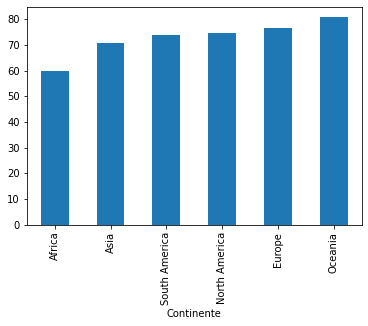

In [ ]:
promedios_cont = data.groupby("Continente")['Life Expectancy'].mean().sort_values()
print(promedios_cont) #Promedio de esperanza de vida por continente
promedios_cont.plot(kind = 'bar') #Gráfico comparación entre continentes

Ahora vamos a comparar los promedios de los paises en 2000 y 2015 y podemos ver que el orden de los continentes segun la esperanza de vida es el mismo.

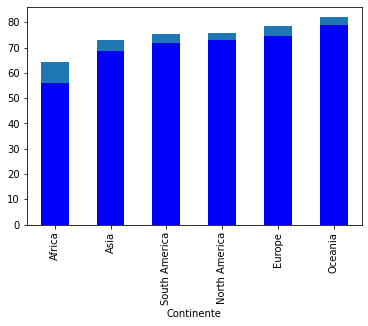

In [ ]:
data.groupby(['Año',"Continente"]).mean().loc[2015]['Life Expectancy'].sort_values().plot(kind = 'bar')
data.groupby(['Año',"Continente"]).mean().loc[2000]['Life Expectancy'].sort_values().plot(kind = 'bar', color='blue')

En el siguiente grafico podemos ver el promedio de esperanza de vida en cada continente y como fue evolucionando desde el 2000 hasta el 2015 

In [ ]:
promedios_cont_año = data.groupby(['Continente','Año'])['Life Expectancy'].mean()
promedios_cont_año.tail()
#promedios_cont_año.unstack()
#Promedio de esperanza de vida de cada año (últimos 15 años) por continente

Continente     Año 
South America  2011    74.5384
               2012    74.7533
               2013    74.9561
               2014    75.1462
               2015    75.3244
Name: Life Expectancy, dtype: float64

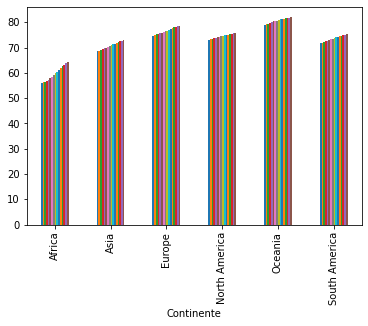

In [ ]:
ax = promedios_cont_año.unstack().plot(kind = 'bar')
ax.get_legend().set_visible(False)
#plt.legend(loc='lower left')

Concluimos en que la diferencia más alta se ve entre África y Oceanía, los cuales tienen las esperanzas de vida más baja y alta respectivamente. Luego, se puede observar que la esperanza en Europa y Norte America son mayores, pero en Asia es levemente menor.  

# Tercera Pregunta

Finalmente, la tercera pregunta que nos hicimos fue ¿Cuáles son los países de América del Sur que más gastos destinan a la salud? ¿Coincide esto con los resultados obtenidos en la pregunta 1 acerca de la esperanza de vida de uno?

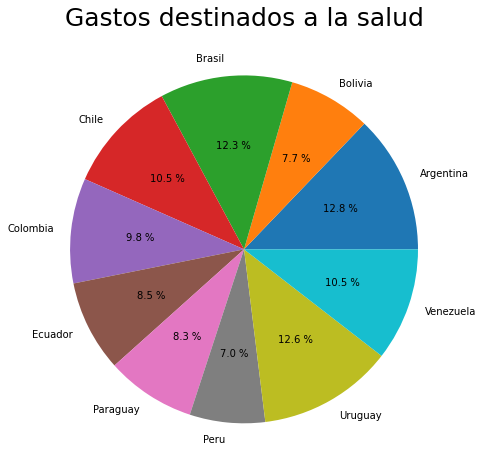

In [ ]:
#import matplotlib.pyplot as plt

continente = data[data['Continente']=='South America']
promedios = list(continente.groupby(['Pais'])['Health expenditure'].mean())

paises = ['Argentina','Bolivia','Brasil','Chile','Colombia','Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'] 

def grafico_torta(titulo, etiquetas, datos):
  plt.figure(figsize = (15,8))
  plt.title(titulo, fontsize = 25) #titulo del gráfico y tamaño de la fuente
  plt.pie(datos, labels  = etiquetas, autopct="%0.1f %%")

grafico_torta("Gastos destinados a la salud", paises, promedios)

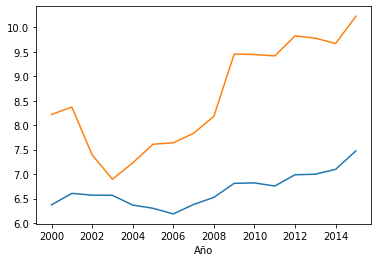

In [ ]:
continente.groupby(['Año'])['Health expenditure'].mean().plot()
continente.groupby(['Pais','Año']).mean().loc['Argentina']['Health expenditure'].plot()

De aquí concluímos que Argentina es el país que más gastos destina a la salud, mientras que Perú es el que menos gasta en ella. Sin embargo, como vimos en la pregunta número 1, Argentina no es el país con mayor esperanza de vida, ni tampoco Perú el menor de ellos. Esto se debe a que debemos analizar más factores (emisión de CO2, población, PBI) para determinar en profundidad la relación entre ellos y la esperanza de vida.